In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

p = sns.color_palette()

## Load the training set

In [2]:
dfTrain = pd.read_csv('data/clicks_train.csv')

In [3]:
print('There are {:,d} rows in this dataset.'.format(dfTrain.shape[0]))

There are 87,141,731 rows in this dataset.


## Figure out how many ads per display and add a column with that info

In [4]:
dfTrain['# ads in display'] = dfTrain.groupby('display_id')['ad_id'].transform('count')

In [5]:
dfTrain.head(20)

,display_id,ad_id,clicked,# ads in display
0,1,42337,0,6
1,1,139684,0,6
2,1,144739,1,6
3,1,156824,0,6
4,1,279295,0,6
5,1,296965,0,6
6,2,125211,0,4
7,2,156535,0,4
8,2,169564,0,4
9,2,308455,1,4


In [6]:
adIDMostDisplayed = dfTrain['ad_id'].value_counts().index[0]

In [7]:
print('The most displayed ad is {} with {:,d} displays'.format(adIDMostDisplayed,
                                                        dfTrain[dfTrain['ad_id'] == adIDMostDisplayed].shape[0]))

The most displayed ad is 173005 with 211,824 displays


## Now get the click likelihood (# clicks for ad / # times ad is displayed)

In [8]:
dfTrain['overall click ratio'] = dfTrain.groupby('ad_id')['clicked'].transform('mean')

In [9]:
dfTrain[dfTrain['ad_id'] == adIDMostDisplayed].head(20)

,display_id,ad_id,clicked,# ads in display,overall click ratio
257,54,173005,0,9,0.076384
500,102,173005,0,3,0.076384
505,103,173005,0,5,0.076384
916,181,173005,0,6,0.076384
925,183,173005,0,6,0.076384
1168,226,173005,0,2,0.076384
1599,311,173005,0,6,0.076384
2000,394,173005,0,9,0.076384
2039,403,173005,0,5,0.076384
2103,414,173005,0,4,0.076384


In [10]:
dfTrain['click ratio per display size'] = dfTrain.groupby(['ad_id', '# ads in display'])['clicked'].transform('mean')

In [11]:
dfTrain[dfTrain['ad_id']==adIDMostDisplayed].head(30)

,display_id,ad_id,clicked,# ads in display,overall click ratio,click ratio per display size
257,54,173005,0,9,0.076384,0.025623
500,102,173005,0,3,0.076384,0.166994
505,103,173005,0,5,0.076384,0.084531
916,181,173005,0,6,0.076384,0.069433
925,183,173005,0,6,0.076384,0.069433
1168,226,173005,0,2,0.076384,0.256781
1599,311,173005,0,6,0.076384,0.069433
2000,394,173005,0,9,0.076384,0.025623
2039,403,173005,0,5,0.076384,0.084531
2103,414,173005,0,4,0.076384,0.106172


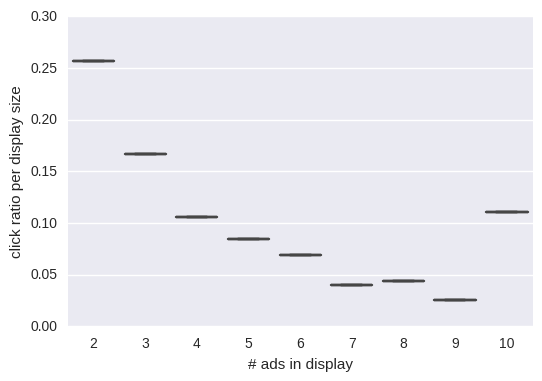

In [12]:
sns.boxplot(x="# ads in display", y="click ratio per display size", data=dfTrain[dfTrain['ad_id']==adIDMostDisplayed])

In [13]:
adHighClicks = dfTrain[(dfTrain['overall click ratio'] > 0.7) & (dfTrain['overall click ratio'] < 0.9)]['ad_id']

In [14]:
adCounts = dfTrain['ad_id'].value_counts()

In [15]:
adHighCounts = adCounts[adCounts > 5000]

In [16]:
set(adHighClicks.index).intersection(set(adHighCounts))

{8224, 8228, 8897, 26274, 42707}

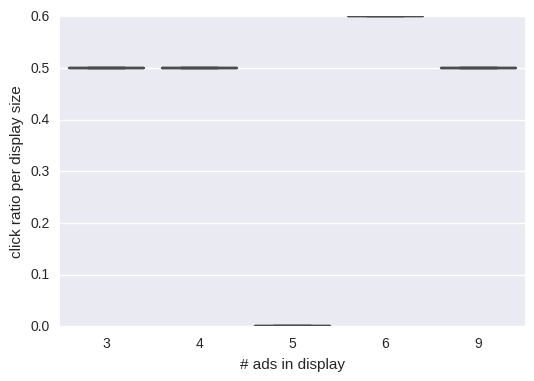

In [17]:
sns.boxplot(x="# ads in display", y="click ratio per display size", data=dfTrain[dfTrain['ad_id']==26274])

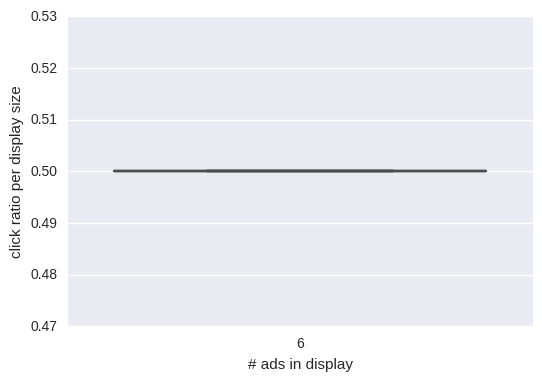

In [18]:
sns.boxplot(x="# ads in display", y="click ratio per display size", data=dfTrain[dfTrain['ad_id']==42707])

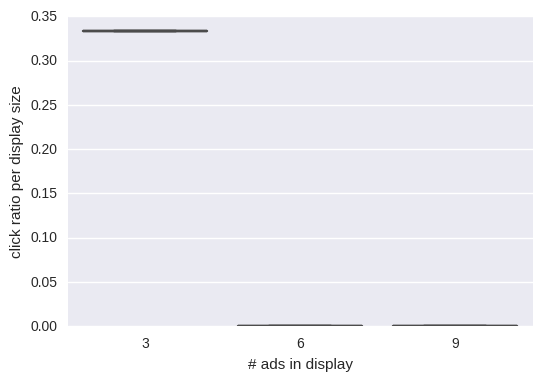

In [19]:
sns.boxplot(x="# ads in display", y="click ratio per display size", data=dfTrain[dfTrain['ad_id']==8228])

In [20]:
# compute one-way ANOVA P value   
from scipy import stats  
      
metricLabel = 'overall click ratio'
treatment1 = dfTrain[dfTrain['# ads in display'] == 2][metricLabel]
treatment2 = dfTrain[dfTrain['# ads in display'] == 3][metricLabel]
treatment3 = dfTrain[dfTrain['# ads in display'] == 4][metricLabel]
treatment4 = dfTrain[dfTrain['# ads in display'] == 5][metricLabel]
treatment5 = dfTrain[dfTrain['# ads in display'] == 6][metricLabel]
treatment6 = dfTrain[dfTrain['# ads in display'] == 7][metricLabel]
treatment7 = dfTrain[dfTrain['# ads in display'] == 8][metricLabel]
treatment8 = dfTrain[dfTrain['# ads in display'] == 9][metricLabel]
treatment9 = dfTrain[dfTrain['# ads in display'] == 10][metricLabel]

f_val, p_val = stats.f_oneway(treatment3, treatment5, treatment4) #,
#                              treatment4, treatment5, treatment6,
#                              treatment7, treatment8, treatment9)  
  
print ('One-way ANOVA P = {}'.format(p_val) ) 

One-way ANOVA P = 0.0


In [21]:
p_val

0.0

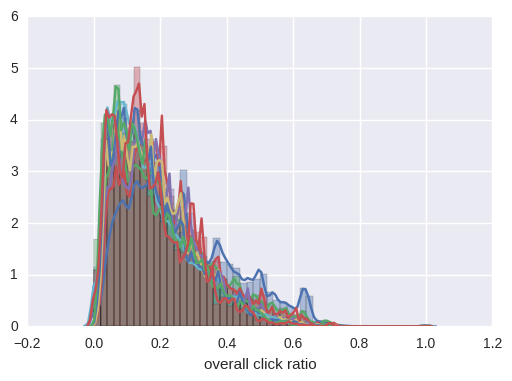

In [22]:
ax1 = sns.distplot(treatment1)
sns.distplot(treatment2, ax=ax1)
sns.distplot(treatment3, ax=ax1)
sns.distplot(treatment4, ax=ax1)
sns.distplot(treatment5, ax=ax1)
sns.distplot(treatment6, ax=ax1)
sns.distplot(treatment7, ax=ax1)
sns.distplot(treatment8, ax=ax1)
sns.distplot(treatment9, ax=ax1)

In [23]:
# compute one-way ANOVA P value   
from scipy import stats  
      
metricLabel = 'click ratio per display size'
treatment1 = dfTrain[dfTrain['# ads in display'] == 2][metricLabel]
treatment2 = dfTrain[dfTrain['# ads in display'] == 3][metricLabel]
treatment3 = dfTrain[dfTrain['# ads in display'] == 4][metricLabel]
treatment4 = dfTrain[dfTrain['# ads in display'] == 5][metricLabel]
treatment5 = dfTrain[dfTrain['# ads in display'] == 6][metricLabel]
treatment6 = dfTrain[dfTrain['# ads in display'] == 7][metricLabel]
treatment7 = dfTrain[dfTrain['# ads in display'] == 8][metricLabel]
treatment8 = dfTrain[dfTrain['# ads in display'] == 9][metricLabel]
treatment9 = dfTrain[dfTrain['# ads in display'] == 10][metricLabel]

f_val, p_val = stats.f_oneway(treatment3, treatment5, treatment4) #,
#                              treatment4, treatment5, treatment6,
#                              treatment7, treatment8, treatment9)  
  
print ('One-way ANOVA P = {}'.format(p_val) ) 

One-way ANOVA P = 0.0


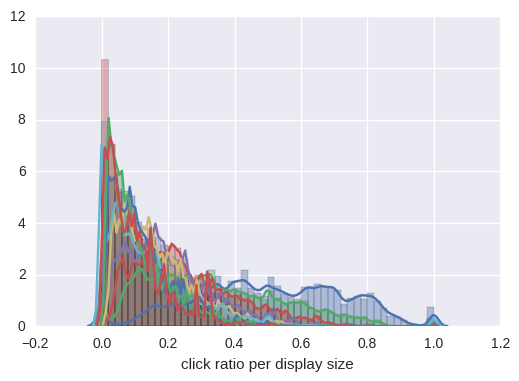

In [24]:
ax1 = sns.distplot(treatment1)
sns.distplot(treatment2, ax=ax1)
sns.distplot(treatment3, ax=ax1)
sns.distplot(treatment4, ax=ax1)
sns.distplot(treatment5, ax=ax1)
sns.distplot(treatment6, ax=ax1)
sns.distplot(treatment7, ax=ax1)
sns.distplot(treatment8, ax=ax1)
sns.distplot(treatment9, ax=ax1)

In [25]:
t = treatment3

print('Mean = {}, Var = {}'.format(t.mean(), t.var()))

Mean = 0.250000000001, Var = 0.0241788386864


In [26]:
p = np.random.poisson(0.5, [10000,])
print('Mean = {}, Var = {}'.format(p.mean(), p.var()))

Mean = 0.5159, Var = 0.54454719


It's not Poisson since the mean does not equal the variance. However, it is an unlikely event.

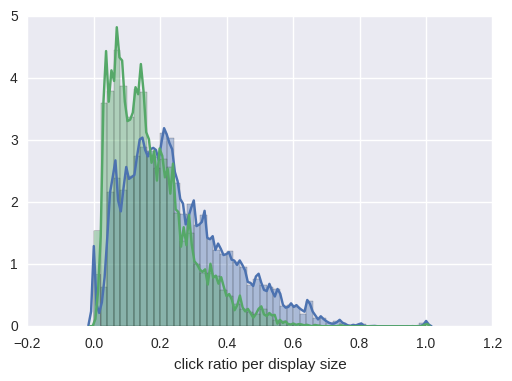

In [27]:
ax1 = sns.distplot(treatment3)
sns.distplot(treatment5, ax=ax1)

In [28]:
treatment3.head()

6     0.143330
7     0.000000
8     0.109244
9     0.447368
35    0.034352
Name: click ratio per display size, dtype: float64

In [29]:
dfTrain['diff'] = dfTrain['overall click ratio'] - dfTrain['click ratio per display size']

In [30]:
dfTrain.head()

,display_id,ad_id,clicked,# ads in display,overall click ratio,click ratio per display size,diff
0,1,42337,0,6,0.167275,0.148072,0.019203
1,1,139684,0,6,0.165695,0.139130,0.026565
2,1,144739,1,6,0.324310,0.289048,0.035262
3,1,156824,0,6,0.032463,0.030976,0.001487
4,1,279295,0,6,0.325373,0.319588,0.005786


## Here's the correct plot
This is looking at the difference between the overall click ratio (across all displays for an ad) versus the click ratio per display size for an ad. Centered around 0. Looks pretty convincing that the click ratio isn't changing much based on the display size.

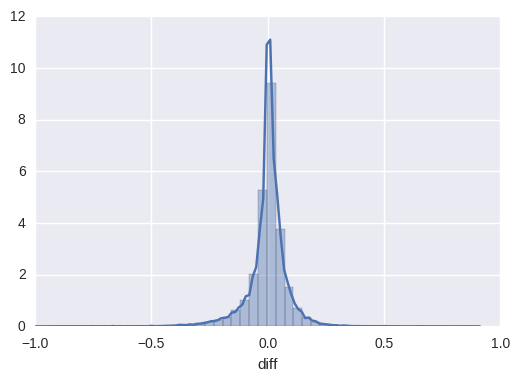

In [31]:
sns.distplot(dfTrain['diff'])

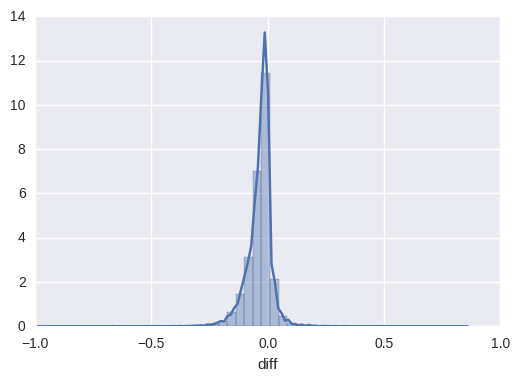

In [32]:
sns.distplot(dfTrain[dfTrain['# ads in display']==4]['diff'])

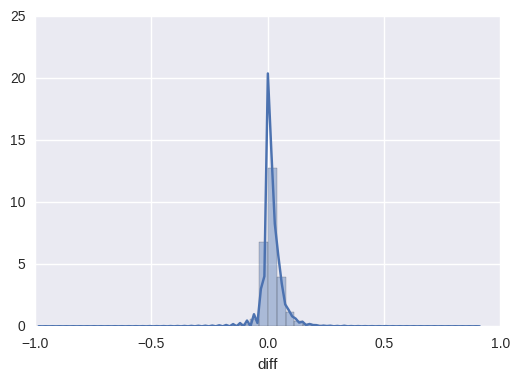

In [33]:
sns.distplot(dfTrain[dfTrain['# ads in display']==6]['diff'])

In [34]:
# compute one-way ANOVA P value   
from scipy import stats  
      
metricLabel = 'diff'
treatment1 = dfTrain[dfTrain['# ads in display'] == 2][metricLabel]
treatment2 = dfTrain[dfTrain['# ads in display'] == 3][metricLabel]
treatment3 = dfTrain[dfTrain['# ads in display'] == 4][metricLabel]
treatment4 = dfTrain[dfTrain['# ads in display'] == 5][metricLabel]
treatment5 = dfTrain[dfTrain['# ads in display'] == 6][metricLabel]
treatment6 = dfTrain[dfTrain['# ads in display'] == 7][metricLabel]
treatment7 = dfTrain[dfTrain['# ads in display'] == 8][metricLabel]
treatment8 = dfTrain[dfTrain['# ads in display'] == 9][metricLabel]
treatment9 = dfTrain[dfTrain['# ads in display'] == 10][metricLabel]

f_val, p_val = stats.f_oneway(treatment1, treatment2, treatment3,
                              treatment4, treatment5, treatment6,
                              treatment7, treatment8, treatment9)  
  
print ('One-way ANOVA P = {}'.format(p_val) ) 

One-way ANOVA P = 0.0


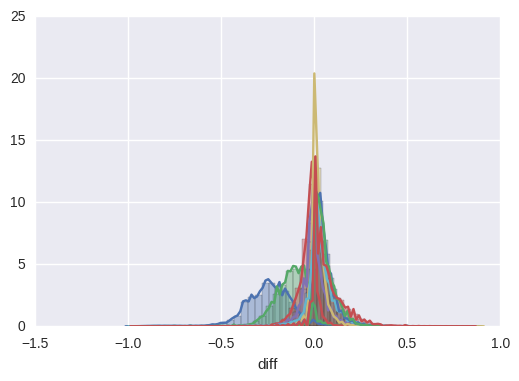

In [35]:
ax1=sns.distplot(treatment1)
sns.distplot(treatment2,ax=ax1)
sns.distplot(treatment3,ax=ax1)
sns.distplot(treatment4,ax=ax1)
sns.distplot(treatment5,ax=ax1)
sns.distplot(treatment6,ax=ax1)
sns.distplot(treatment7,ax=ax1)
sns.distplot(treatment8,ax=ax1)
sns.distplot(treatment9,ax=ax1)


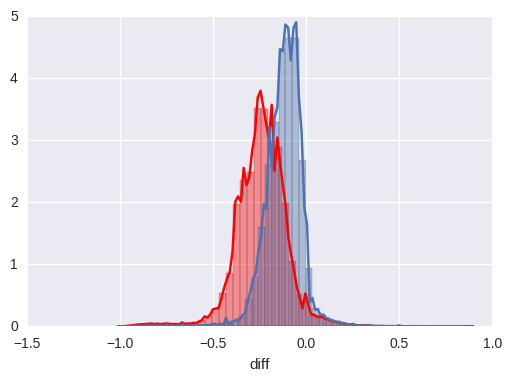

In [39]:
ax1=sns.distplot(treatment1, color='r')
sns.distplot(treatment2,ax=ax1)

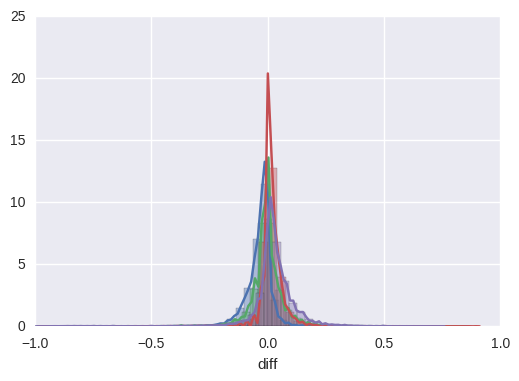

In [41]:
ax1=sns.distplot(treatment3)
sns.distplot(treatment4,ax=ax1)
sns.distplot(treatment5,ax=ax1)
sns.distplot(treatment6,ax=ax1)

In [44]:
# compute one-way ANOVA P value   
from scipy import stats  
      
f_val, p_val = stats.f_oneway(treatment4, treatment5, treatment6)  
  
print ('One-way ANOVA P = {}'.format(p_val) ) 

One-way ANOVA P = 0.0


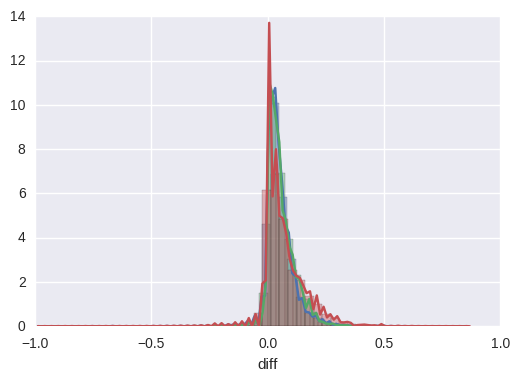

In [42]:
ax1=sns.distplot(treatment7)
sns.distplot(treatment8,ax=ax1)
sns.distplot(treatment9,ax=ax1)

## Just showing that using p-values in an ANOVA is a terrible metric.

All 9 of these distributions are alike. The only difference is a 0.001 offset in the mean. However, due to large number of samples, even that difference is significant according to alpha. It is far better to plot the histograms and see the difference.

In [36]:
p1 = np.random.normal(0.001, 0.1, 10000)
p2 = np.random.normal(0, 0.1, 10000)
p3 = np.random.normal(0, 0.1, 10000)
p4 = np.random.normal(0, 0.1, 10000)
p5 = np.random.normal(0, 0.1, 10000)
p6 = np.random.normal(0, 0.1, 10000)
p7 = np.random.normal(0, 0.1, 10000)
p8 = np.random.normal(0, 0.1, 10000)
p9 = np.random.normal(0, 0.1, 10000)

f_val, p_val = stats.f_oneway(p1, p2, p3, p4, p5, p6, p7, p8, p9)
print ('One-way ANOVA P = {}'.format(p_val) ) 

One-way ANOVA P = 0.426527521472


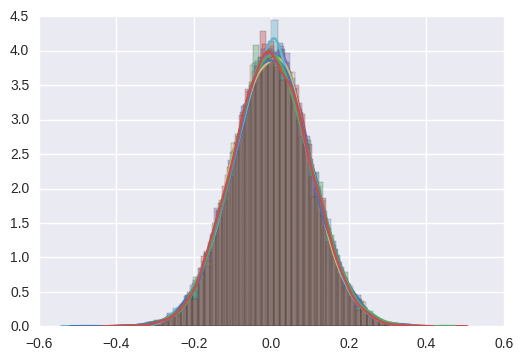

In [37]:
ax1=sns.distplot(p1)
sns.distplot(p2,ax=ax1)
sns.distplot(p3,ax=ax1)
sns.distplot(p4,ax=ax1)
sns.distplot(p5,ax=ax1)
sns.distplot(p6,ax=ax1)
sns.distplot(p7,ax=ax1)
sns.distplot(p8,ax=ax1)
sns.distplot(p9,ax=ax1)
